# LAG 1 Autocorrelation
> - Função de autocorrelação: https://www.alura.com.br/artigos/funcao-de-autocorrelacao
> - Funções de Autocorrelação e de Autocorrelação Parcial: https://www.ibm.com/docs/pt-br/spss-modeler/18.5.0?topic=data-autocorrelation-partial-autocorrelation-functions
> - Guia completo para criar Time Series (com código em Python): https://www.vooo.pro/insights/guia-completo-para-criar-time-series-com-codigo-em-python/
> - Análise Exploratória de Séries Temporais: https://analisemacro.com.br/econometria-e-machine-learning/analise-exploratoria-de-series-temporais/
> - Modelo ARIMA com Gretl e Python: https://medium.com/ibmec-quant/modelo-arima-com-gretl-e-python-f0593f95472e

In [5]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ------------------------- -------------- 6.3/9.9 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 26.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Synthetic temporal series
np.random.seed(42)
data = np.random.randn(100)

# Transforming data into a DataFrame
df = pd.DataFrame(data, columns=["Valores"])

df


,Valores
0,0.496714
1,-0.138264
2,0.647689
3,1.523030
4,-0.234153
...,...
95,-1.463515
96,0.296120
97,0.261055
98,0.005113


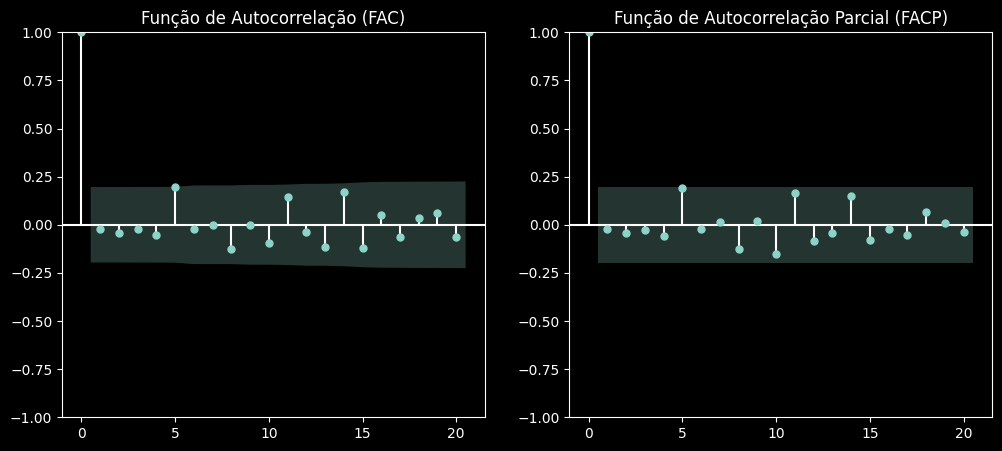

In [9]:
# Creating the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) Graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Autocorrelation Chart (FAC)
sm.graphics.tsa.plot_acf(df["Valores"], lags=20, ax=axes[0])
axes[0].set_title("Função de Autocorrelação (FAC)")

# Partial Autocorrelation Chart (FACP)
sm.graphics.tsa.plot_pacf(df["Valores"], lags=20, ax=axes[1], method="ywm")
axes[1].set_title("Função de Autocorrelação Parcial (FACP)")

plt.show()

# Tendency slope (inclination)
> - Data has two trends; how to extract independent trendlines? <https://stats.stackexchange.com/questions/33078/data-has-two-trends-how-to-extract-independent-trendlines>
> -Complete Guide on Time Series Analysis in Python: https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python#Table-of-Contents

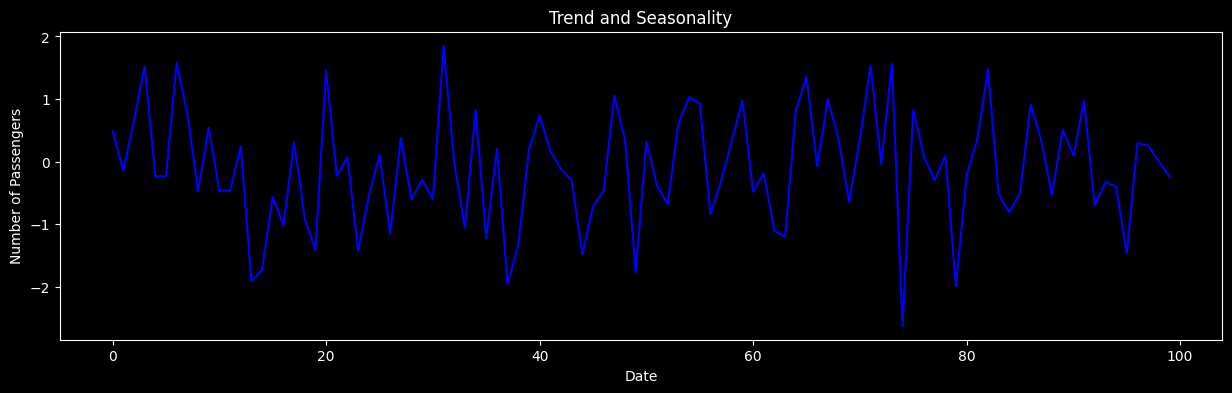

In [12]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Number of Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.iloc[:, 0], title='Trend and Seasonality')

# Dominant frequency
> - Convert the time series into a frequency domain
> - See what frequency with greatter amplitude
> - Frequency with greatter amplitude is the dominant

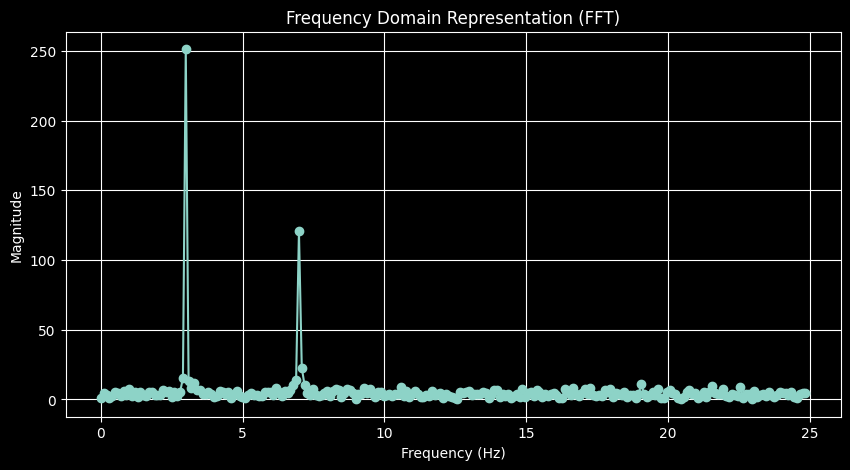

In [14]:
# Simulated time series (sum of two sine waves with noise)
np.random.seed(42)
time = np.linspace(0, 10, 500)  # 500 time points from 0 to 10
signal = np.sin(2 * np.pi * 3 * time) + 0.5 * np.sin(2 * np.pi * 7 * time) + np.random.randn(500) * 0.2

# Compute FFT
fft_values = np.fft.fft(signal)  # Compute Fourier Transform
frequencies = np.fft.fftfreq(len(time), d=(time[1] - time[0]))  # Frequency bins

# Keep only positive frequencies (since FFT gives both positive and negative)
positive_freqs = frequencies[:len(frequencies) // 2]
positive_magnitudes = np.abs(fft_values[:len(frequencies) // 2])

# Plot the Frequency Spectrum
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, positive_magnitudes, marker="o", linestyle="-")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Frequency Domain Representation (FFT)")
plt.grid()
plt.show()

# Spectral entropy

# Statistical result of the Augmented Dickey-Fuller test